# Multiple linear regression


## Introduction

**Goal:** 

Analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where business uses TV, social media, radio, and influencer promotions to increase sales. Previously we worked on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help to target on marketing efforts.

To address the business' request, we will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

In [3]:
# RUN THIS CELL TO IMPORT DATA.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize with the data's features

Start with an exploratory data analysis to familiarize ourself with the data and prepare it for modeling.

In [4]:
# Explore data size
data.shape

(572, 5)

In [5]:
# Get summary statistics about the data
data.describe(include = 'all')

,TV,Radio,Social Media,Influencer,Sales
count,572,572.000000,572.000000,572,572.000000
unique,3,NaN,NaN,4,NaN
top,Medium,NaN,NaN,Nano,NaN
freq,205,NaN,NaN,157,NaN
mean,NaN,17.520616,3.333803,NaN,189.296908
std,NaN,9.290933,2.238378,NaN,89.871581
min,NaN,0.109106,0.000031,NaN,33.509810
25%,NaN,10.699556,1.585549,NaN,118.718722
50%,NaN,17.149517,3.150111,NaN,184.005362
75%,NaN,24.606396,4.730408,NaN,264.500118


In [6]:
# Get distinct Values for category variable
cat_values = {col: data[col].unique() for col in data[['TV', 'Influencer']]}
cat_values

{'TV': array(['Low', 'High', 'Medium'], dtype=object),
 'Influencer': array(['Micro', 'Mega', 'Nano', 'Macro'], dtype=object)}

In [7]:
# Check if there exists rows containing missing data 
data.isna().any(axis=1).sum()

0

Before we construct our multiple linear regression model, we need to explore variables which would be included in our regression model. From above exploration, we can breifly know that there is no missing data exsiting in our dataset. There are 572 rows and 5 columns in our data table.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

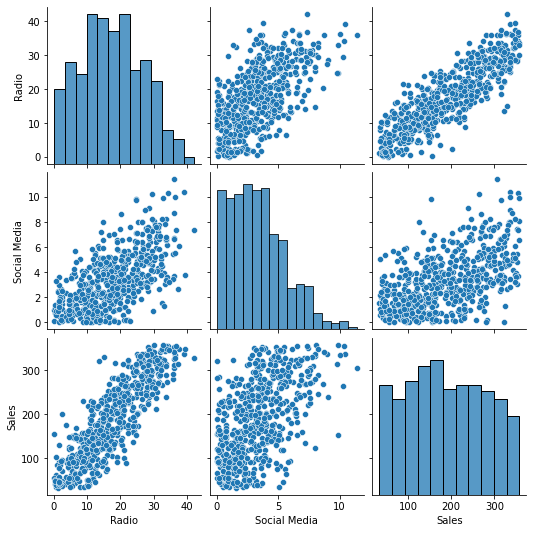

In [8]:
# Create a pairplot of the data.
sns.pairplot(data)

`TV` and `Influencer` are categorical variables so they are not shown in above plot.

From above plot, we can observe a linear relationship between `Radio` and `Sales`, also between `Social Media` and `Sales`.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [9]:
# Calculate the mean sales for each TV category. 

mean_sales_tv = data[['TV', 'Sales']].groupby(by = data['TV']).mean()
print( mean_sales_tv)

# Calculate the mean sales for each Influencer category. 

mean_sales_influencer = data[['Influencer', 'Sales']].groupby(by = data['Influencer']).mean()
print(mean_sales_influencer)


             Sales
TV                
High    300.853195
Low      90.984101
Medium  195.358032
                 Sales
Influencer            
Macro       181.670070
Mega        194.487941
Micro       188.321846
Nano        191.874432


`TV` has three distinct values `low`, `high` and `medium`. `Sales`' value are quite different among them. `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

`Influencer` has four distinct values `Macro`, `Mega` `Nano`,and `Micro`. `Sales`' value are spreading around 190 which means variation is not substantial.`Influencer` may be a weak predictor of `Sales`.

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [10]:
# Rename all columns in data that contain a space. 

data.columns = ['TV', 'Radio', 'Social_Media','Influencer','Sales']
data.head(5)

,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of our choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [11]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio + Social_Media'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()


# Display the model results.
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1335.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          7.29e-287
Time:                        04:07:22   Log-Likelihood:                -2713.9
No. Observations:                 572   AIC:                             5438.
Df Residuals:                     567   BIC:                             5460.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.6473      6.290     34.761      0.000     206.293     231.002
C(TV)[T.Low]     -154.3121      4.934    -31.277      0.000    -164.003    -144.622
C(TV)[T.Medium]   -75.3279      3.628    -20.763      0.000     -82.454     -68.202
Radio               2.9891      0.234     12.763      0.000       2.529       3.449
Social_Media       -0.1500      0.673     -0.223      0.824      -1.471       1.171
==============================================================================
Omnibus:                       60.947   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.035
Skew:                           0.046   Prob(JB):                     0.000121
Kurtosis:                       2.135   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`TV` and `Radio` seems to be statitstically significant factors with small p value. `Social Media` has a >0.05 p value which indicates it might not be a good variable to be selected. 

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for our model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) we selected previously with `Sales` to check the linearity assumption. Use the pairplot we created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

Text(0, 0.5, 'Sales')

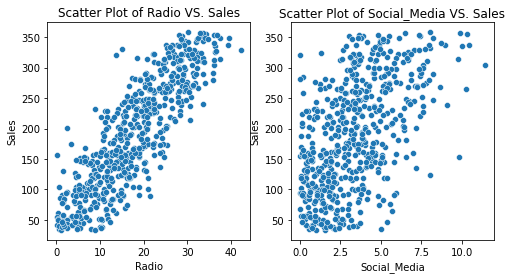

In [19]:
# Create a scatterplot for each independent variable and the dependent variable.
fig, axe = plt.subplots(1,2, figsize=(8,4))

sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axe[0])
axe[0].set_title('Scatter Plot of Radio VS. Sales')
axe[0].set_xlabel('Radio')
axe[0].set_ylabel('Sales')

sns.scatterplot(x=data['Social_Media'], y=data['Sales'], ax=axe[1])
axe[1].set_title('Scatter Plot of Social_Media VS. Sales')
axe[1].set_xlabel('Social_Media')
axe[1].set_ylabel('Sales')



Radio VS Sales (Moderate Positive Correlation) 

Social Media VS Sales (Week Positive Correlation)

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

Text(0.5, 1.0, 'Norm Q-Q Plot')

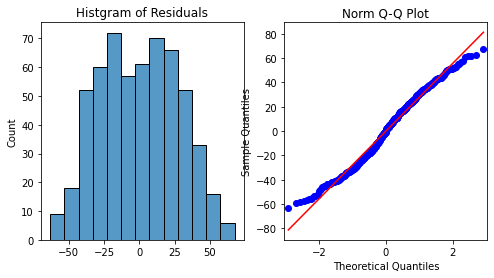

In [25]:
# Calculate the residuals.

residuals = model.resid


# Create a histogram with the residuals. 
fig, axe = plt.subplots(1,2, figsize = (8,4))
sns.histplot(residuals, ax = axe[0])
axe[0].set_title('Histgram of Residuals')

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line = 's', ax=axe[1])
axe[1].set_title('Norm Q-Q Plot')


The histgram of residuals is approximately normal distributed and the Q-Q plot is approximately along a straight line so the normality assumption is met.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

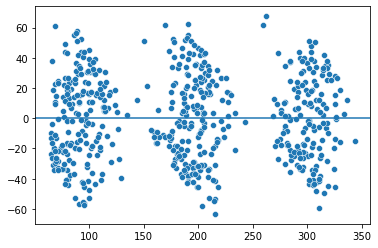

In [27]:
# Create a scatterplot with the fitted values from the model and the residuals.

fitted_values = model.fittedvalues

sns.scatterplot(x=fitted_values, y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.axhline(0)

plt.show()

The residual points are spreading in 3 groups. This is because the involvement of `TV` factor which is dominating this model. In other words, TV is the biggest factor that decides the sales. 

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check our model's no multicollinearity assumption.

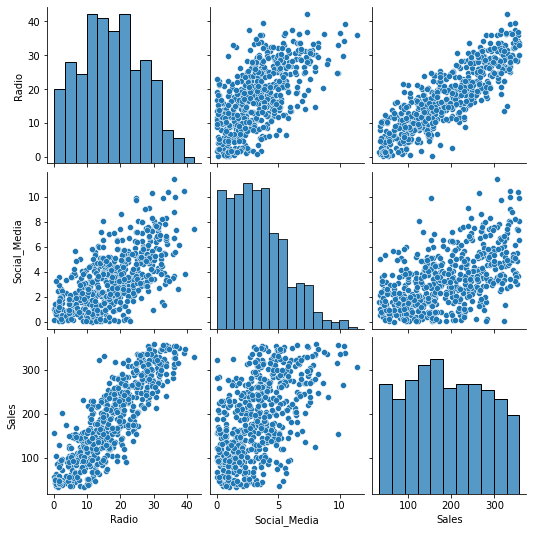

In [28]:
# Create a pairplot of the data.
sns.pairplot(data)


In [32]:
# Calculate the variance inflation factor (optional).

from statsmodels.stats.outliers_influence import variance_inflation_factor

data_sub = data[['Radio', 'Social_Media']]
vif =[ variance_inflation_factor(data_sub.values, i) for i in range(data_sub.shape[1])]
# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=data_sub.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


From the scatterplot, a moderate correlation can be observed between `Radio` and `Social Media`. 5.17 vif for both variable also indicate a high multicolinearity. We should remove one of those two variables from the model. Considering `Radio` having a strong correlation with `Sales`, it is good to exclude `Social Media`.



## Step 4: Results and evaluation

### Display the OLS regression results

Since the No multicollinearity assumption is not met. Let's remove `Social Media` from our model and refit the model.

In [33]:
# Re-define the ols formula
ols_formula2 = 'Sales ~  C(TV) + Radio'

# Build the model

OLS2 = ols(formula = ols_formula2, data= data)

# Fit the model 

model2 = OLS2.fit()

# Display the model results summary.

model_results2 = model2.summary()

model_results2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.63e-288
Time:                        04:45:35   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

90.4% variance of `Sales` can be explained by variable `TV` and `Radio` which means this is a good fit model. 

### Interpret model coefficients

With the model fit evaluated, we can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [34]:
# Display the model results summary.
model_results2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.63e-288
Time:                        04:45:35   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

For every million increase in the Radio budget while holding TV Low and TV Medium as 0, we expect Sales to increase by 2.9669 millions.
There is a $95\%$ chance that the interval $[2.551, 3.383]$ contains the true parameter of the slope of $\beta_{Radio}$ when TV High is chosen.

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

`Low` `TV` promotion is 154.2971 lower on average Sales compared to a `high` `TV` promotion given the same `Radio` promotion.
There is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$ when TV Low is chosen instead of TV High.

`Medium` `TV` promotion is 75.3120 lower on average Sales compared to a `high` `TV` promotion given the same `Radio` promotion.
There is a $95\%$ chance that the interval $[-82.431,-68.193]$ contains the true parameter of the slope of $\beta_{TVMedium}$ when TV Low is chosen instead of TV High.

p value of those two predictors are both <0.05 which means they are both statistically significant predictors.


## Conclusion

From previous simple linear regression, we found that `TV` is an important predictor for `Sales`.  In this analysis, `TV` promotion budget is grouped into three levels, `Low`, `Medium`, and `High` which would give us a more clear ideas on how `TV` budget would affect `Sales`. 

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 
